In [9]:
import pandas as pd
import numpy as np

filepath = "/home/gustavo/Downloads/Mudança de hábitos do consumidor.csv"
data = pd.read_csv(filepath, sep=";", decimal=",")

data.head()

,Marca temporal,Idade,Gênero,Instrução,Com quem você mora?,Quantidade de pessoas que mora,Renda familiar,Eu tento reduzir meu consumo de água e energia pensando em outras pessoas,"Eu jogo o lixo em lugares adequados para manter as vias (ruas, estradas, calçadas) limpas","Em um restaurante, eu peço somente a quantidade de comida que posso comer para evitar gastos",...,"Eu compro e uso produtos que são ""environmentally friendly""",Eu me preocupo com a falta de recursos naturais,Costumo ler o rótulo de produtos para ver se existem informações sobre cuidados com o meio ambiente,Eu tento comprar alimentos orgânicos por serem menos agressivos ao meio ambiente,Eu sempre lembro que excesso de consumo pode causar falta de recursos naturais,É minha responsabilidade controlar os desejos de compras excessivas para o bem das futuras gerações,Eu passei a utilizar menos sacolas plásticas durante o período da pandemia,Eu passei a comprar mais produtos sustentáveis durante o período da pandemia,Eu passei a reciclar mais durante o período da pandemia,Eu passei a evitar mais o desperdício de comida durante o período da pandemia
0,03/08/2022 10:04,De 18 a 27 anos,Feminino,Graduação Incompleta/ Em curso,Com parentes,2.0,Superior a 10 salários mínimos,Concordo,Concordo totalmente,Concordo totalmente,...,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Discordo,Concordo,Concordo,Concordo
1,03/08/2022 10:09,De 18 a 27 anos,Masculino,Graduação Incompleta/ Em curso,Com os pais,1.0,Acima de 7 até 10 salários mínimos,Concordo,Concordo totalmente,Concordo totalmente,...,Neutro,Concordo totalmente,Discordo totalmente,Discordo totalmente,Concordo totalmente,Concordo totalmente,Discordo totalmente,Discordo totalmente,Discordo totalmente,Concordo
2,03/08/2022 10:19,De 18 a 27 anos,Masculino,Graduação,Com parentes,2.0,Acima de 7 até 10 salários mínimos,Neutro,Concordo totalmente,Concordo totalmente,...,Neutro,Concordo totalmente,Concordo,Concordo,Concordo,Concordo,Discordo,Neutro,Neutro,Neutro
3,03/08/2022 10:23,De 18 a 27 anos,Masculino,Graduação Incompleta/ Em curso,Com os pais,2.0,De 4 a 7 salários mínimos,Concordo totalmente,Concordo totalmente,Neutro,...,Concordo totalmente,Concordo totalmente,Concordo totalmente,Neutro,Concordo totalmente,Neutro,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
4,03/08/2022 10:25,De 18 a 27 anos,Feminino,Graduação Incompleta/ Em curso,Sozinho,0.0,Acima de 7 até 10 salários mínimos,Neutro,Concordo totalmente,Neutro,...,Concordo,Concordo,Concordo,Neutro,Discordo,Concordo,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente


In [10]:
# Removendo as instâncias com idades menores que 18 anos e com idades maiores que 42 anos
data = data[data["Idade"] != "Menos de 18 anos"]
data = data[data["Idade"] != "Mais de 42 anos"]

In [11]:
# Codificando as variaveis categóricas
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()

data["Idade"] = label_binarizer.fit_transform(data["Idade"]) + 1
data["Gênero"] = label_binarizer.fit_transform(data["Gênero"]) + 1
data["Com quem você mora?"] = label_binarizer.fit_transform(data["Com quem você mora?"])
data["Instrução"] = label_binarizer.fit_transform(data["Instrução"]) + 1
data["Renda familiar"] = label_binarizer.fit_transform(data["Renda familiar"]) + 1
data["Quantidade de pessoas que mora"] = data["Quantidade de pessoas que mora"].astype(int)

mapa_da_escala_likert = {
    "Concordo totalmente": 5,
    "Concordo": 4,
    "Neutro": 3,
    "Discordo": 2,
    "Discordo totalmente": 1
}

data.replace(mapa_da_escala_likert, inplace=True)


data.head()

,Marca temporal,Idade,Gênero,Instrução,Com quem você mora?,Quantidade de pessoas que mora,Renda familiar,Eu tento reduzir meu consumo de água e energia pensando em outras pessoas,"Eu jogo o lixo em lugares adequados para manter as vias (ruas, estradas, calçadas) limpas","Em um restaurante, eu peço somente a quantidade de comida que posso comer para evitar gastos",...,"Eu compro e uso produtos que são ""environmentally friendly""",Eu me preocupo com a falta de recursos naturais,Costumo ler o rótulo de produtos para ver se existem informações sobre cuidados com o meio ambiente,Eu tento comprar alimentos orgânicos por serem menos agressivos ao meio ambiente,Eu sempre lembro que excesso de consumo pode causar falta de recursos naturais,É minha responsabilidade controlar os desejos de compras excessivas para o bem das futuras gerações,Eu passei a utilizar menos sacolas plásticas durante o período da pandemia,Eu passei a comprar mais produtos sustentáveis durante o período da pandemia,Eu passei a reciclar mais durante o período da pandemia,Eu passei a evitar mais o desperdício de comida durante o período da pandemia
0,03/08/2022 10:04,1,1,1,0,2,1,4,5,5,...,5,5,5,5,5,5,2,4,4,4
1,03/08/2022 10:09,1,2,1,0,1,2,4,5,5,...,3,5,1,1,5,5,1,1,1,4
2,03/08/2022 10:19,1,2,1,0,2,2,3,5,5,...,3,5,4,4,4,4,2,3,3,3
3,03/08/2022 10:23,1,2,1,0,2,1,5,5,3,...,5,5,5,3,5,3,5,5,5,5
4,03/08/2022 10:25,1,1,1,0,0,2,3,5,3,...,4,4,4,3,2,4,5,5,5,5


Definindo se a pandemia afetou o consumo sustentável do consumidor

In [12]:
def e_consumo_sustentavel(row) -> int:
    consumo_sustentavel = {
        'Eu passei a utilizar menos sacolas plásticas durante o período da pandemia': [4, 5],
        'Eu passei a comprar mais produtos sustentáveis durante o período da pandemia': [4, 5],
        'Eu passei a reciclar mais durante o período da pandemia': [4, 5],
        'Eu passei a evitar mais o desperdício de comida durante o período da pandemia': [4, 5]
    }
    counter = 0
    for column, values in consumo_sustentavel.items():
        if row[column] in values:
            counter += 1
    if counter >= 3:
        return 1
    return 0

data['Consumo Sustentavel'] = data.apply(e_consumo_sustentavel, axis=1)
data.to_csv("/home/gustavo/Downloads/mudança_de_habitos_do_consumidor_processado.csv", sep=";", decimal=",", encoding="utf-8", index=False)

In [13]:
data.drop(columns=['Marca temporal'], inplace=True)

In [14]:
target = data["Consumo Sustentavel"]
features = data.drop(["Consumo Sustentavel"], axis=1)

In [15]:
import statsmodels.api as sm

feature_columns = list(features.columns)

features["const"] = 1
features = features[["const", *feature_columns]]
columns = features.columns[:-4]

model = sm.Logit(target, features[columns]).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.458489
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Consumo Sustentavel   No. Observations:                  147
Model:                           Logit   Df Residuals:                      120
Method:                            MLE   Df Model:                           26
Date:                 Tue, 24 May 2022   Pseudo R-squ.:                  0.2622
Time:                         16:17:05   Log-Likelihood:                -67.398
converged:                        True   LL-Null:                       -91.349
Covariance Type:             nonrobust   LLR p-value:                  0.005545
======================================================================================================================================================================================================================================
                                                                                                                                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                                                                 -7.2307      4.102     -1.763      0.078     -15.271       0.810
Idade                                                                                                                                                                 -1.2202      0.640     -1.906      0.057      -2.475       0.035
Gênero                                                                                                                                                                -0.7359      0.562     -1.310      0.190      -1.837       0.365
Instrução                                                                                                                                                              1.9907      1.296      1.536      0.125      -0.550       4.532
Com quem você mora?                                                                                                                                                    0.8397      0.701      1.198      0.231      -0.534       2.213
Quantidade de pessoas que mora                                                                                                                                         0.0735      0.186      0.396      0.692      -0.291       0.438
Renda familiar                                                                                                                                                        -0.3815      0.563     -0.677      0.498      -1.486       0.722
Eu tento reduzir meu consumo de água e energia pensando em outras pessoas                                                                                              0.1044      0.252      0.414      0.679      -0.389       0.598
Eu jogo o lixo em lugares adequados para manter as vias (ruas, estradas, calçadas) limpas                                                                             -0.1555      0.649     -0.240      0.811      -1.427       1.116
Em um restaurante, eu peço somente a quantidade de comida que posso comer para evitar gastos                                                                           0.2417      0.260      0.929      0.353      -0.268       0.752
Eu evito exagerar na realização de minhas compras                                                                                                                     -0.2256      0.293     -0.771      0.441      -0.799       0.34

In [16]:
model.predict(features[columns])

0      0.845628
1      0.011816
2      0.277086
3      0.400455
4      0.677034
         ...   
152    0.303157
153    0.040685
154    0.013765
155    0.088054
156    0.031491
Length: 147, dtype: float64

In [17]:
pd.DataFrame(model.summary().tables[1]).to_csv("coeficientes.csv", sep=";", decimal=",", encoding="utf-8", index=False)

In [36]:
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("/home/gustavo/mudança_de_habitos_do_consumidor_reprocessado_e_renomeado.csv", sep=";", decimal=",", encoding="utf-8")
df.drop(columns=['Data'], inplace=True)

In [44]:
df = df[['Idade', 'Instrucao', 'Cuid_MA1', 'Cuid_MA4', 'CS']]

In [45]:
features = df.drop(["CS"], axis=1)
target = df["CS"]

In [46]:
# Fazendo o modelo

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(features, target)

LogisticRegression(max_iter=1000)

In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import pandas as pd

def evaluate_logistic_regression(model, features, target):
    predictions = model.predict(features)
    accuracy = model.score(features, target)
    precision = precision_score(target, predictions)
    recall = recall_score(target, predictions)
    f1 = f1_score(target, predictions)
    conf_matrix = confusion_matrix(target, predictions)
    confusion_matrix_data_frame = pd.DataFrame(conf_matrix, index=['False', 'True'], columns=['Predicted False', 'Predicted True'])
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
    display(confusion_matrix_data_frame)
    print(f'Accuracy: {accuracy:.4}\nPrecision: {precision:.4}\nRecall: {recall:.4}\nF1: {f1:.4}\nSensitivity: {sensitivity:.4}\nSpecificity: {specificity:.4}')

evaluate_logistic_regression(model, features, target)

,Predicted False,Predicted True
False,87,14
True,27,19


Accuracy: 0.7211
Precision: 0.5758
Recall: 0.413
F1: 0.481
Sensitivity: 0.413
Specificity: 0.8614


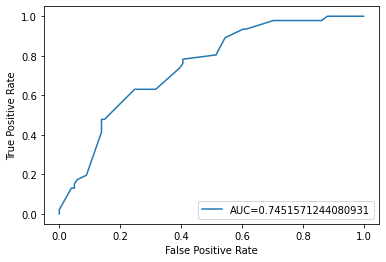

In [68]:
# Fazendo o grafico da curva ROC
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
y_pred_proba = model.predict_proba(features)[::,1]
fpr, tpr, thresholds = roc_curve(target,  y_pred_proba)
auc = roc_auc_score(target, y_pred_proba)
#create ROC curve
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [72]:
# 1 - roc_auc_score(target, y_pred_proba)
model.info

LogisticRegression(max_iter=1000)